# Mohamed Soueidatt - C12989

#### Solutions des exercices du chapitre 6

### Ex. 1 – Ellipse


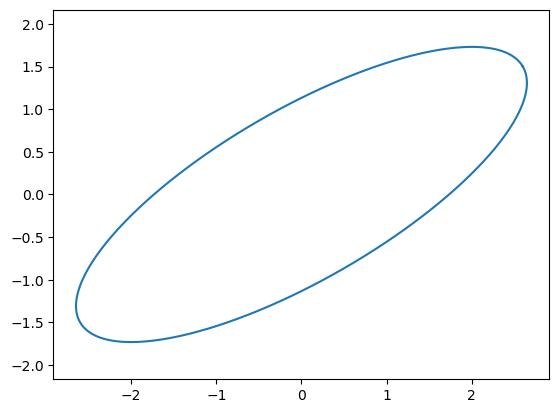

In [1]:
import numpy as np, matplotlib.pyplot as plt
def plot_ellipse(xc,yc,a,b,theta=0.0,n=400):
    t=np.linspace(0,2*np.pi,n)
    ct,st=np.cos(theta),np.sin(theta)
    x=xc+a*np.cos(t)*ct-b*np.sin(t)*st
    y=yc+a*np.cos(t)*st+b*np.sin(t)*ct
    plt.figure();plt.plot(x,y);plt.axis('equal');plt.show()
plot_ellipse(0,0,3,1,np.pi/6)


### Ex. 2 – Iterative Averaging Animation


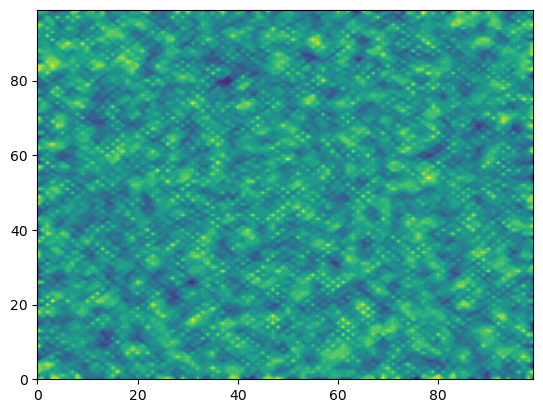

In [2]:
import numpy as np, matplotlib.pyplot as plt
arr=np.random.rand(100,100)
plt.ion();fig,ax=plt.subplots()
for _ in range(60):
    arr[1:-1,1:-1]=(arr[:-2,1:-1]+arr[2:,1:-1]+arr[1:-1,:-2]+arr[1:-1,2:])/4
    ax.clear();ax.contourf(arr,levels=25);plt.pause(0.05)
plt.ioff();plt.show()


### Ex. 3 – Toroidal Shear (Cat Map)


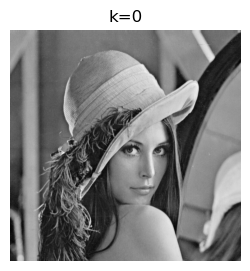

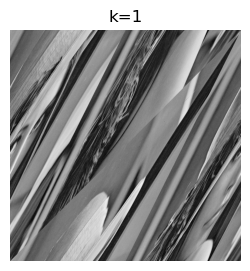

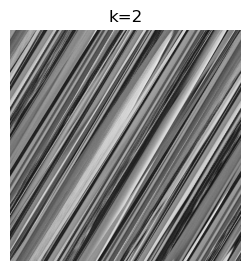

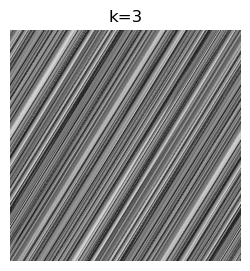

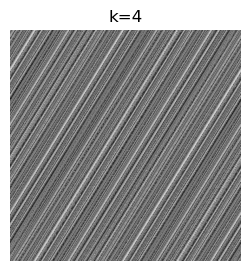

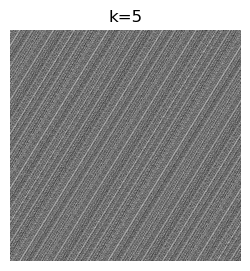

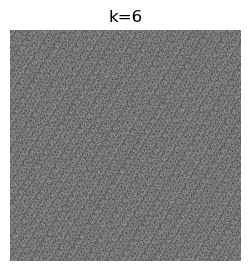

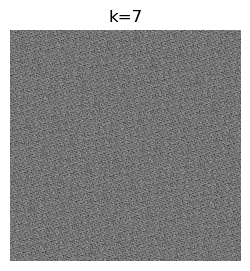

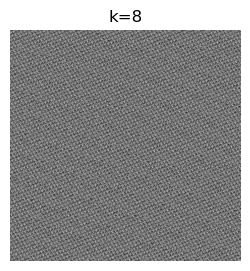

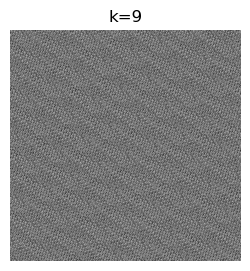

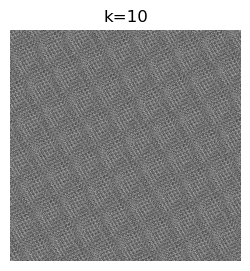

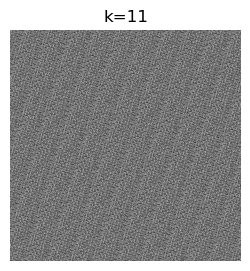

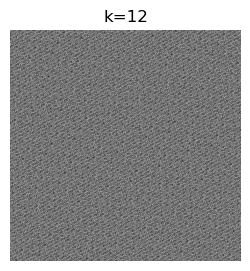

In [10]:
import numpy as np, matplotlib.pyplot as plt, matplotlib.image as mpimg
I0 = mpimg.imread('lena.png')
if I0.ndim == 3:
    I0 = I0[...,:3].mean(axis=2)
I0 = I0[:512,:512]
N = I0.shape[0]
x, y = np.indices((N, N))
imgs = [I0]
for _ in range(12):
    x, y = (x + y) % N, (x + 2 * y) % N
    imgs.append(I0[x, y])
for k, img in enumerate(imgs):
    plt.figure(figsize=(3, 3)); plt.imshow(img, cmap='gray'); plt.axis('off'); plt.title(f'k={k}')
    plt.show()


### Ex. 4 – Contour on Image


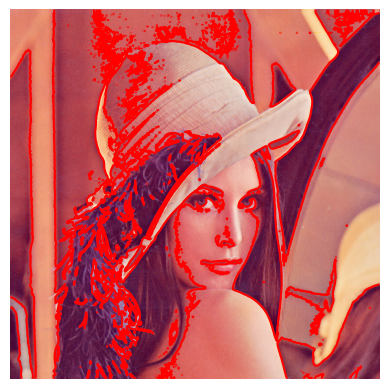

In [11]:
from imageio.v3 import imread
import numpy as np, matplotlib.pyplot as plt
img=imread('lena.png')
gray=img.mean(axis=2)
plt.imshow(img);plt.contour(gray,levels=[128],colors='red');plt.axis('off');plt.show()


### Ex. 5 – Edges via Laplacian


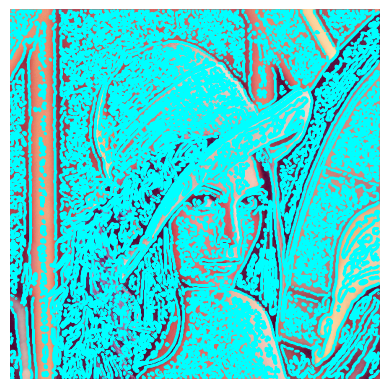

In [12]:
from imageio.v3 import imread
import numpy as np, matplotlib.pyplot as plt
from scipy.ndimage import gaussian_laplace
img=imread('lena.png')
gray=img.mean(axis=2)
lap=gaussian_laplace(gray,2)
zc=np.zeros_like(lap,dtype=bool);zc[:-1,:-1]=lap[:-1,:-1]*lap[1:,1:]<0
plt.imshow(img);plt.contour(zc,levels=[0.5],colors='cyan');plt.axis('off');plt.show()


### Ex. 6 – Mandelbrot with ogrid


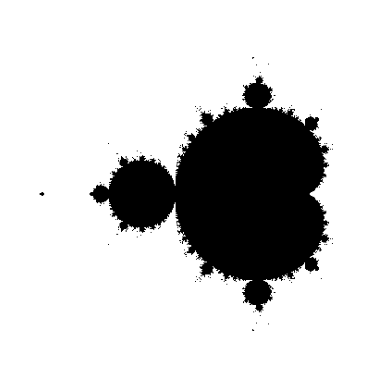

In [13]:
import numpy as np, matplotlib.pyplot as plt
h=w=400
Y,X=np.ogrid[-1.4:1.4:h*1j,-2:0.8:w*1j]
c=X+1j*Y;z=c.copy();m=np.full(c.shape,True,bool)
for _ in range(50):
    z[m]=z[m]**2+c[m];m=np.abs(z)<=4
plt.imshow(~m,cmap='gray',extent=[-2,0.8,-1.4,1.4]);plt.axis('off');plt.show()


### Ex. 7 – arctan Approximation of Heaviside


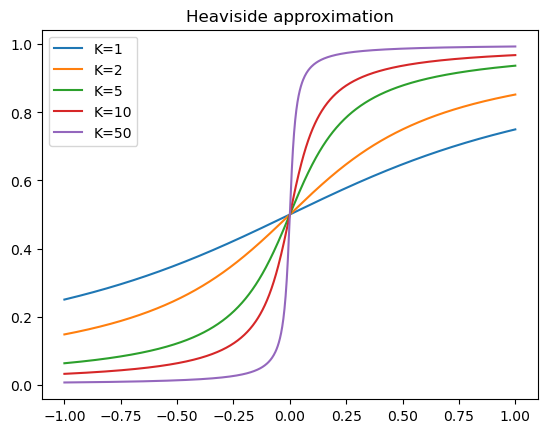

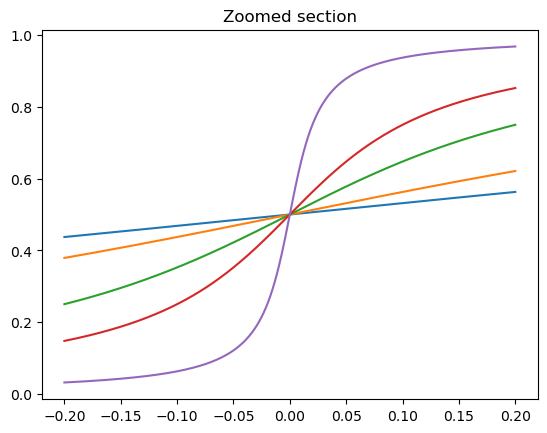

In [14]:
import numpy as np, matplotlib.pyplot as plt
x=np.linspace(-1,1,800)
Ks=[1,2,5,10,50]
for K in Ks:plt.plot(x,0.5+np.arctan(K*x)/np.pi,label=f'K={K}')
plt.legend();plt.title('Heaviside approximation');plt.show()
plt.figure()
x_zoom=np.linspace(-0.2,0.2,800)
for K in Ks:plt.plot(x_zoom,0.5+np.arctan(K*x_zoom)/np.pi)
plt.title('Zoomed section');plt.show()
